##**Use sympy to solve the following questions**
**1. Solve the quadratic function $x^2+2x-8=0$**

In [ ]:
from sympy import *



**2. What is the function f(x) which is equal to its
derivative?**

**3. Compute the area under $f(x)=x^3$ from x=0 to x=1**

**4. Calculate $\displaystyle\sum\limits_{x=0}^\infty \left(\frac{1}{x!}\right)$**

**5. Calculate $\lim_{n \rightarrow \infty}(1+\frac{1}{n})^n$**

**6. flips the matrix through its diagonal $\begin{bmatrix}2&-3&-8&7 \\-2&-1&2&-7\\ 1&0&-3&6 \end{bmatrix}$**

**7. Row operations: We know the following matrix**

In [ ]:
 M = eye(3)
 M

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

**Do matrix row operations to R2 ← R2 + 3R1. (update Row 2 to R2+3*R1). Print the matrix**

**8.Find determinant of M**

**9.Find the following matrix's eigenvalue and eigen vector**

In [12]:
 import numpy.core as np
 from numpy.linalg import eig
M = np.array( [[ 9, -2], [-2, 6]] )
w,v = eig(M) 
print('E-value:', w)
print('E-vector', v)

E-value: [10.  5.]
E-vector [[ 0.89442719  0.4472136 ]
 [-0.4472136   0.89442719]]


**10. Implement the Predator-prey model in python**

Suppose fish starts at 10 hundreds, bears starts at 1 hundred

alpha = 1.1

beta = 0.4

delta = 0.1

gamma = 0.4

draw the plots(bear-time, fish-time)

t = np.linspace(0,50,num=1000)


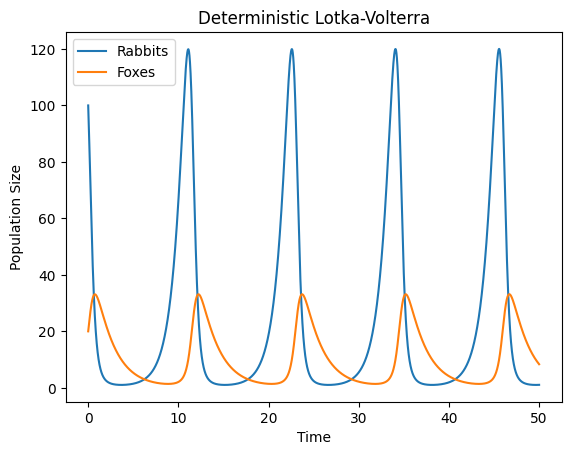

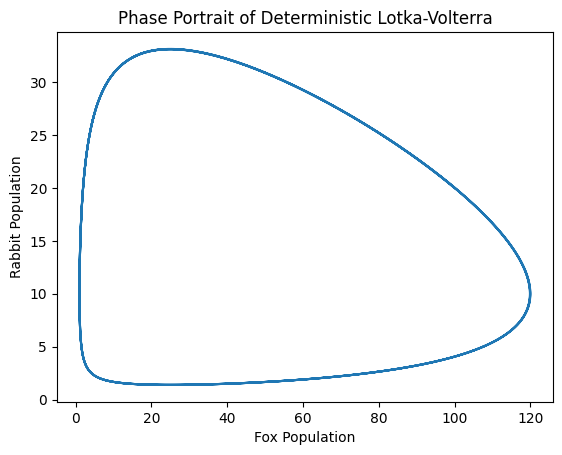

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as npy
import random

# timestep determines the accuracy of the euler method of integration
timestep = 0.0001
# amplitude of noise term
amp = 0.00
# the time at which the simulation ends
end_time = 50

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize rabbits (x) and foxes (y) vectors
x = []
y = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

"""" definition of lotka-volterra parameters"""
# birth rate of rabbits
a = 1
# death rate of rabbits due to predation
b = 0.1
# natural death rate of foxes
c = 0.5
# factor that describes how many eaten rabbits give birth to a new fox
d = 0.02

""" euler integration """

# initial conditions for the rabbit (x) and fox (y) populations at time=0
x.append(100)
y.append(20)

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
    
    # make parameters stochastic
#     a = a + StochasticTerm(amp)
#     b = b + StochasticTerm(amp)
#     c = c + StochasticTerm(amp)
#     d = d + StochasticTerm(amp)
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    x.append(next_x)
    y.append(next_y)

""" visualization """

if amp == 0:    
    # visualization of deterministic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Rabbits', 'Foxes'))
    plt.title('Deterministic Lotka-Volterra')
    plt.show()

    # deterministic phase portrait
    plt.plot(x,y)
    plt.xlabel('Fox Population')
    plt.ylabel('Rabbit Population')
    plt.title('Phase Portrait of Deterministic Lotka-Volterra')
    plt.show()
    
else:
    # visualization of stochastic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Rabbits', 'Foxes'))
    plt.title('Stochastic Lotka-Volterra')
    plt.show()

    # stochastic phase portrait
    plt.plot(x,y)
    plt.xlabel('Fox Population')
    plt.ylabel('Rabbit Population')
    plt.title('Phase Portrait of Stochastic Lotka-Volterra')
    plt.show()
    
    # noise term visualization
    noise = []
    n =[]
    for sample in range(100):
        noise.append(StochasticTerm(amp))
        n.append(sample)

    plt.plot(n, noise)
    plt.xlabel('Arbitrary Noise Samples')
    plt.ylabel('Noise')
    plt.title('Perturbation to Birth Rate')
    plt.show()